# TITANIC SURVIVAL PREDICTION CLASSIFICATION MODEL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            

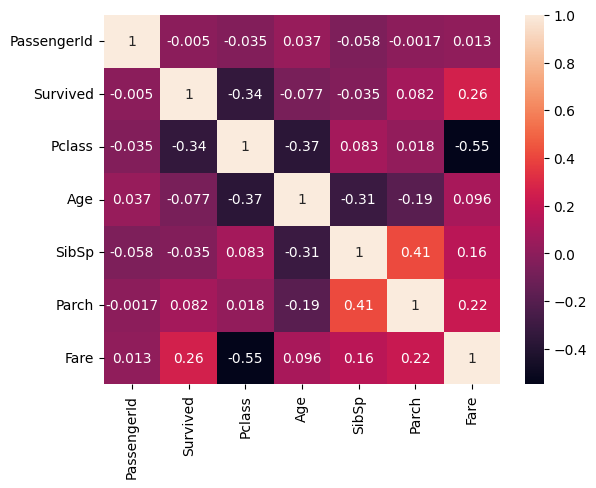

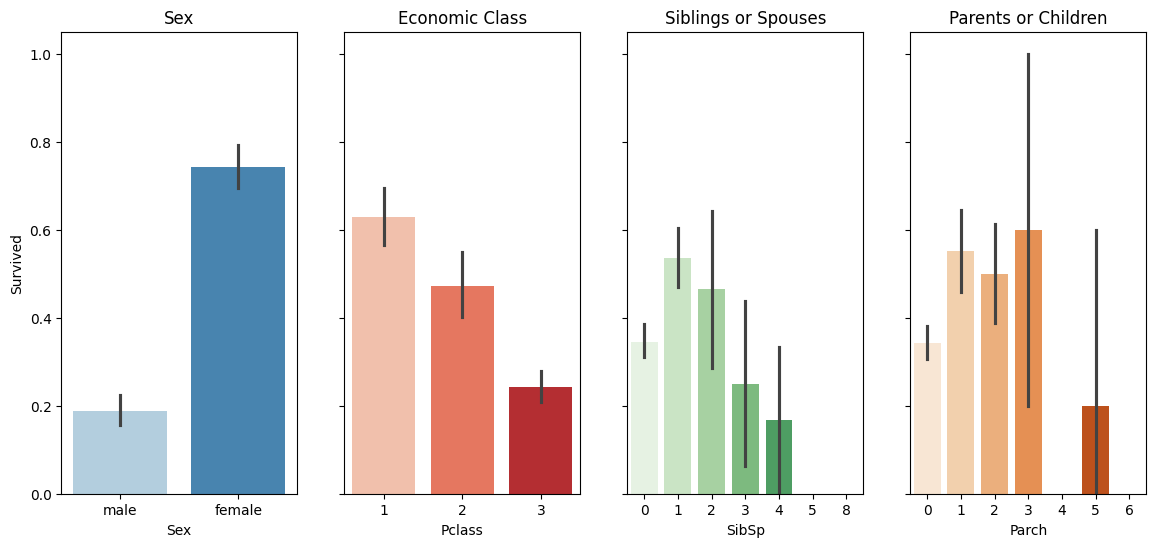

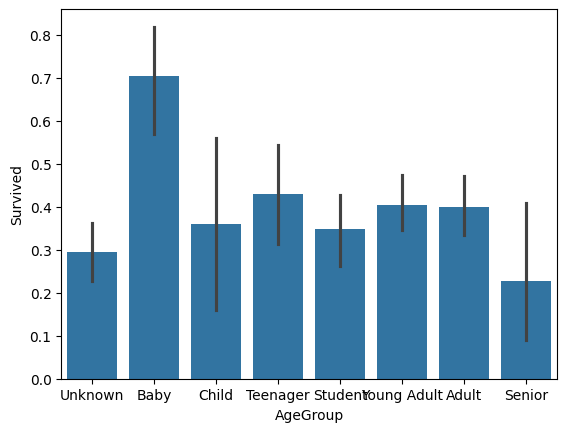

Shape before dropping:  (891, 13)
Shape after dropping:  (891, 11)
Unique values in 'Embarked' column:
['S' 'C' 'Q' nan]
Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,1,0,3,0,1,0,1,4.0,1
1,2,1,1,1,1,0,2,6.0,4
2,3,1,3,1,0,0,1,5.0,2
3,4,1,1,1,1,0,1,5.0,4
4,5,0,3,0,0,0,1,5.0,2
5,6,0,3,0,0,0,3,5.0,2
6,7,0,1,0,0,0,1,6.0,4


82.23


In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns            #for attractive statistical graphics, python visualisation library

#ignore warnings
import warnings
warnings.filterwarnings('ignore') #ignoring all potential warnings that may arise, declutters the outpur by not displaying non-critical warnings

#import train and test CSV files, training and testing files have been separated due to data set availabiloty in kaggle
# the train file has 891 data points and the test file has 418 data points that is we have used 68% of the data to train the model and 32% to test the model
train = pd.read_csv("C:/Users/Admin/Downloads/train.csv")
test = pd.read_csv("C:/Users/Admin/Downloads/test.csv")

#take a look at the training data
#NaN = Not a Number
#top = most frequent value
#freq = frequency of the most frequent value
#25% is the 25th percentile - the value below which 25% of the data points fall
#why do we need the describe function?

train.info()
train.describe(include="all")

#get a list of the features within the dataset
print(train.columns)

#see a sample of the dataset to get an idea of the variables
train.sample(7)
#observations: 
#Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
#Categorical Features: Survived, Sex, Embarked, Pclass
#Alphanumeric Features: Ticket, Cabin

#check for any other unusable values
print(pd.isnull(train).sum())

# Function to calculate the percentage of null values in a column
def percentage_null(column):
    total_rows = len(train)
    null_count = train[column].isna().sum()
    percentage = (null_count / total_rows) * 100
    return percentage

# Calculate percentage of null values in each column
print(f"Percentage of null values in '{'Age'}': {percentage_null('Age'):.2f}%")
print(f"Percentage of null values in '{'Cabin'}': {percentage_null('Cabin'):.2f}%")
print(f"Percentage of null values in '{'Embarked'}': {percentage_null('Embarked'):.2f}%")

#percentage of null values in Age is to be filled
#percentage of null values in cabin is too large hence we should drop the feature
#percentage of null values in Embarked is too less hence harmless

# Select specific columns by name
selected_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']
df_selected = train[selected_columns]
sns.heatmap(df_selected.corr(),annot=True)

#Visualising the data

fig, axes = plt.subplots(1, 4, figsize=(14, 6), sharey=True)

#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train, ax=axes[0], palette='Blues')
axes[0].set_title('Sex')

#print percentages of females vs. males that survive
#normalize gives the proportion of each unique value (0 or 1) in the 'Survived' column
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
print('\n')

#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train, ax=axes[1], palette='Reds')
axes[1].set_title('Economic Class')

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)
print('\n')

#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train, ax=axes[2], palette='Greens')
axes[2].set_title('Siblings or Spouses')

#percentage values
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)
print('\n')

#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train, ax=axes[3], palette='Oranges')
axes[3].set_title('Parents or Children')
plt.show()

#sort the ages into logical categories
#filling nulls with -0.5
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
#np.inf = infinty so any age above 60 = Senior
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#from general obseravtion, the fare and the Pclass give the same information hence we can drop the fare feature
##percentage of null values in cabon is too large hence we should drop the feature
#values in the ticket column are random and don't add any value to the prediction hence we should drop that

#dropping irrelavant features
print("Shape before dropping: ",train.shape)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
print("Shape after dropping: ",train.shape)

#now we need to fill in the missing values in the Embarked feature
# Find unique values in the 'Embarked' column
unique_values = train['Embarked'].unique()

# Print unique values
print("Unique values in 'Embarked' column:")
print(unique_values)

print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

#replacing the missing values in the Embarked feature with S as it is in the majority
train = train.fillna({"Embarked": "S"})

#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
# extracts a string ending with a period and making it a new column (feature)
#expand=False ensures that the result is returned as a Series or array rather than a DataFrame.
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#displaying extracted values in the same table
pd.crosstab(train['Title'], train['Sex'])

#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

#calculates the mean of the 'Survived' column within each group defined by 'Title'.
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

#map each of the title groups to a numerical value
#assign 0 to rows with missing values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

#display(train.head(25))

#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

#dropping the Age feature
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

train.head()

#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

#fill in missing Fare value in test set based on mean fare for that Pclass 
#filters the train DataFrame to rows where Pclass equals the passenger's class and then computes the mean fare for those rows.
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
#creates a new column 'FareBand' which categorizes the fare values into 4 quantiles, labeled from 1 to 4.
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train = train.drop(['Title'], axis = 1)
test = test.drop(['Title'], axis = 1)

display(train.head(7))

from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = logreg.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)
